In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./Electronic_sales_Sep2023-Sep2024.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        20000 non-null  int64  
 1   Age                20000 non-null  int64  
 2   Gender             19999 non-null  object 
 3   Loyalty Member     20000 non-null  object 
 4   Product Type       20000 non-null  object 
 5   SKU                20000 non-null  object 
 6   Rating             20000 non-null  int64  
 7   Order Status       20000 non-null  object 
 8   Payment Method     20000 non-null  object 
 9   Total Price        20000 non-null  float64
 10  Unit Price         20000 non-null  float64
 11  Quantity           20000 non-null  int64  
 12  Purchase Date      20000 non-null  object 
 13  Shipping Type      20000 non-null  object 
 14  Add-ons Purchased  15132 non-null  object 
 15  Add-on Total       20000 non-null  float64
dtypes: float64(3), int64(4

In [4]:
df.columns = df.columns.str.lower()

In [5]:
df.head()

,customer id,age,gender,loyalty member,product type,sku,rating,order status,payment method,total price,unit price,quantity,purchase date,shipping type,add-ons purchased,add-on total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56


# EDA

In [6]:
df.shape

(20000, 16)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer id        20000 non-null  int64  
 1   age                20000 non-null  int64  
 2   gender             19999 non-null  object 
 3   loyalty member     20000 non-null  object 
 4   product type       20000 non-null  object 
 5   sku                20000 non-null  object 
 6   rating             20000 non-null  int64  
 7   order status       20000 non-null  object 
 8   payment method     20000 non-null  object 
 9   total price        20000 non-null  float64
 10  unit price         20000 non-null  float64
 11  quantity           20000 non-null  int64  
 12  purchase date      20000 non-null  object 
 13  shipping type      20000 non-null  object 
 14  add-ons purchased  15132 non-null  object 
 15  add-on total       20000 non-null  float64
dtypes: float64(3), int64(4

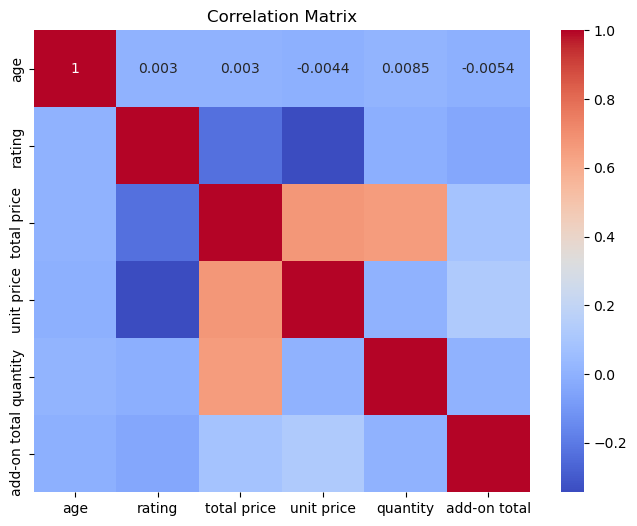

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.select_dtypes(include='number').drop(['customer id'], axis=1).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [77]:
correlation_matrix

,age,rating,total price,unit price,quantity,add-on total
age,1.000000,0.002995,0.003036,-0.004384,0.008461,-0.005357
rating,0.002995,1.000000,-0.232401,-0.343845,-0.008530,-0.044301
total price,0.003036,-0.232401,1.000000,0.673984,0.653851,0.083876
unit price,-0.004384,-0.343845,0.673984,1.000000,0.006739,0.125209
quantity,0.008461,-0.008530,0.653851,0.006739,1.000000,0.003336
add-on total,-0.005357,-0.044301,0.083876,0.125209,0.003336,1.000000


In [8]:
df[['age', 'rating','unit price','total price', 'add-on total']].describe()

,age,rating,unit price,total price,add-on total
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,48.994100,3.093950,578.631867,3180.133419,62.244848
std,18.038745,1.223764,312.274076,2544.978675,58.058431
min,18.000000,1.000000,20.750000,20.750000,0.000000
25%,33.000000,2.000000,361.180000,1139.680000,7.615000
50%,49.000000,3.000000,463.960000,2534.490000,51.700000
75%,65.000000,4.000000,791.190000,4639.600000,93.842500
max,80.000000,5.000000,1139.680000,11396.800000,292.770000


In [9]:
#checking whether the columns contain null values. 
df[['rating', 'unit price']].isnull().sum()
#since they don't, can proceed to check their correlations

rating        0
unit price    0
dtype: int64

the above figure of -0.34 shows that there is no correlation between the columns

In [10]:
df['gender'].value_counts(normalize=True)

gender
Male      0.508225
Female    0.491775
Name: proportion, dtype: float64

In [11]:
df['loyalty member'].value_counts(normalize=True)

loyalty member
No     0.78285
Yes    0.21715
Name: proportion, dtype: float64

In [12]:
df['order status'].value_counts(normalize=True)

order status
Completed    0.6716
Cancelled    0.3284
Name: proportion, dtype: float64

In [13]:
df['payment method'].value_counts(normalize=True)

payment method
Credit Card      0.29340
Bank Transfer    0.16855
PayPal           0.16420
Paypal           0.12570
Cash             0.12460
Debit Card       0.12355
Name: proportion, dtype: float64

/opt/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



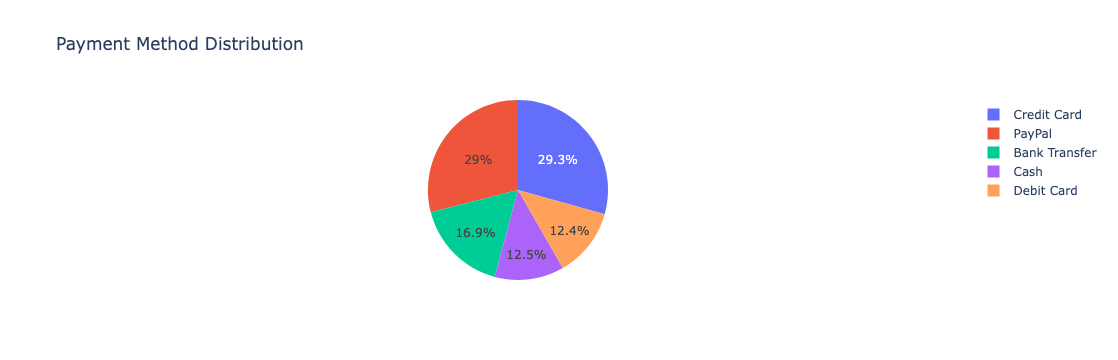

/opt/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



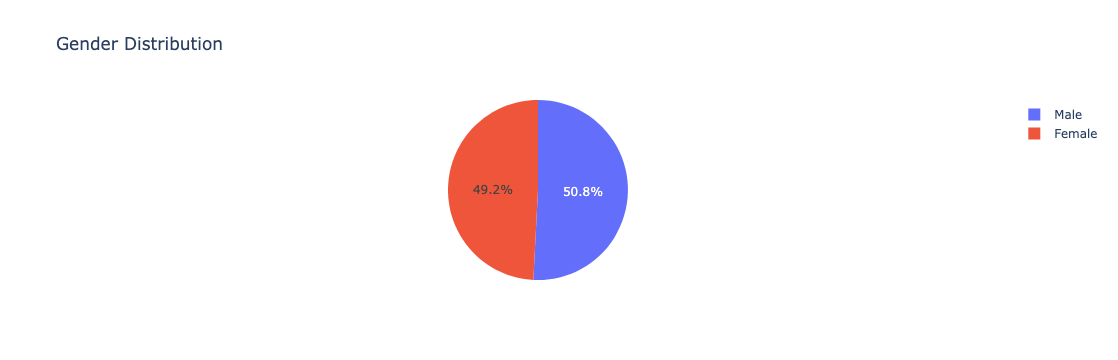

/opt/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



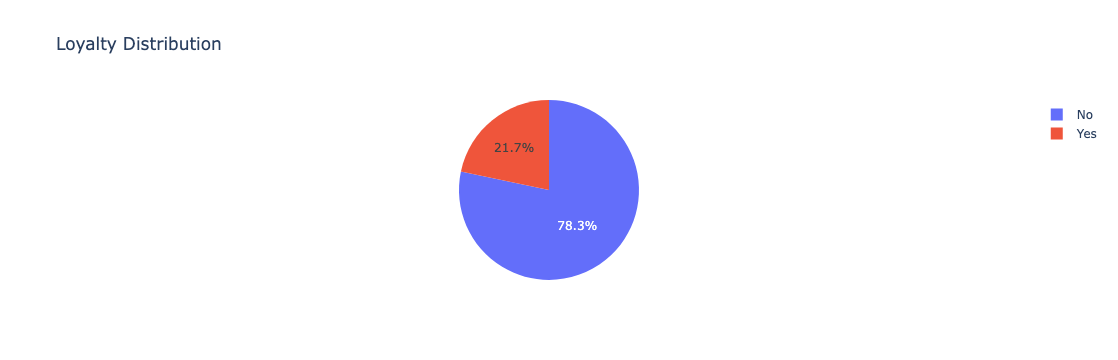

/opt/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



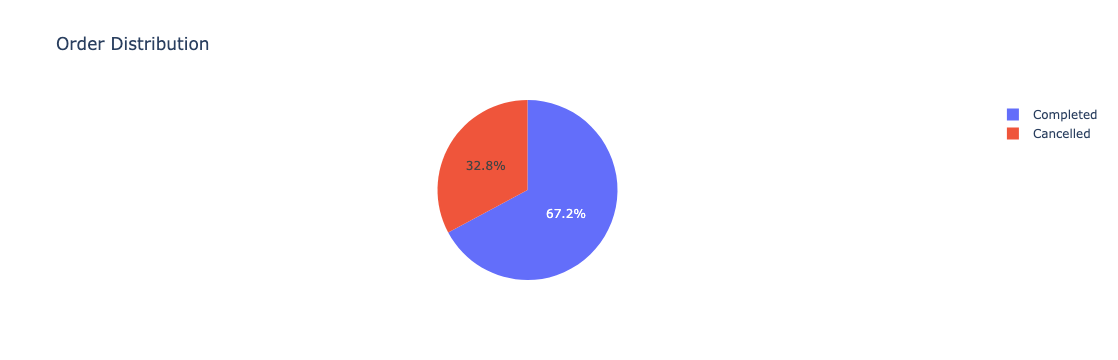

/opt/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



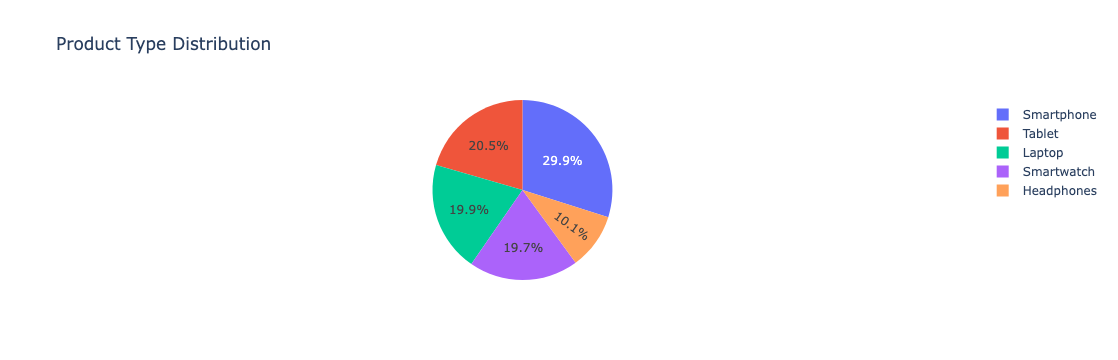

In [78]:
import plotly.express as px

#payment method distribution
payment_methods = df['payment method'].value_counts().reset_index()
payment_methods.columns = ['payment method', 'count']  # Rename columns

# Plotting the pie chart using Plotly
fig_payments = px.pie(payment_methods, 
             names='payment method', 
             values='count', 
             title='Payment Method Distribution')

#gender distribution
genders = df['gender'].value_counts().reset_index()
genders.columns = ['gender', 'count']  # Rename columns

fig_genders = px.pie(genders, 
             names='gender', 
             values='count', 
             title='Gender Distribution')

#loyalty distribution
loyalty_members = df['loyalty member'].value_counts().reset_index()
loyalty_members.columns = ['loyalty member', 'count']  # Rename columns

fig_members = px.pie(loyalty_members, 
             names='loyalty member', 
             values='count', 
             title='Loyalty Distribution')

#order status
order_statuses = df['order status'].value_counts().reset_index()
order_statuses.columns = ['order status', 'count']  # Rename columns

fig_orders = px.pie(order_statuses, 
             names='order status', 
             values='count', 
             title='Order Distribution')


#product type
product_types = df['product type'].value_counts().reset_index()
product_types.columns = ['product type', 'count']  # Rename columns

fig_products = px.pie(product_types, 
             names='product type', 
             values='count', 
             title='Product Type Distribution')


fig_payments.show()
fig_genders.show()
fig_members.show()
fig_orders.show()
fig_products.show()

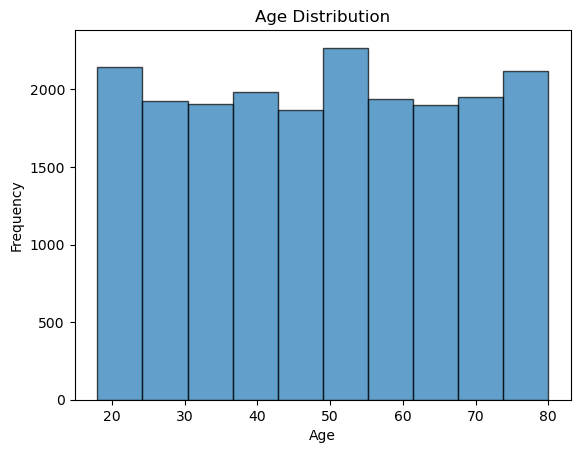

In [14]:
plt.hist(df['age'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Data Preprocessing

In [15]:
df['payment method'].value_counts(normalize=True)

payment method
Credit Card      0.29340
Bank Transfer    0.16855
PayPal           0.16420
Paypal           0.12570
Cash             0.12460
Debit Card       0.12355
Name: proportion, dtype: float64

In [16]:
df['payment method'] = df['payment method'].replace({'Paypal': 'PayPal'})

In [17]:
df['loyalty member'] = df['loyalty member'].astype('string')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer id        20000 non-null  int64  
 1   age                20000 non-null  int64  
 2   gender             19999 non-null  object 
 3   loyalty member     20000 non-null  string 
 4   product type       20000 non-null  object 
 5   sku                20000 non-null  object 
 6   rating             20000 non-null  int64  
 7   order status       20000 non-null  object 
 8   payment method     20000 non-null  object 
 9   total price        20000 non-null  float64
 10  unit price         20000 non-null  float64
 11  quantity           20000 non-null  int64  
 12  purchase date      20000 non-null  object 
 13  shipping type      20000 non-null  object 
 14  add-ons purchased  15132 non-null  object 
 15  add-on total       20000 non-null  float64
dtypes: float64(3), int64(4

In [19]:
#dropping a row with no gender
df = df.dropna(subset=['gender'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19999 entries, 0 to 19998
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer id        19999 non-null  int64  
 1   age                19999 non-null  int64  
 2   gender             19999 non-null  object 
 3   loyalty member     19999 non-null  string 
 4   product type       19999 non-null  object 
 5   sku                19999 non-null  object 
 6   rating             19999 non-null  int64  
 7   order status       19999 non-null  object 
 8   payment method     19999 non-null  object 
 9   total price        19999 non-null  float64
 10  unit price         19999 non-null  float64
 11  quantity           19999 non-null  int64  
 12  purchase date      19999 non-null  object 
 13  shipping type      19999 non-null  object 
 14  add-ons purchased  15132 non-null  object 
 15  add-on total       19999 non-null  float64
dtypes: float64(3), int64(4), ob

In [80]:
# Filling up empty column cells with empty string
df.loc[:, 'add-ons purchased'] = df.loc[:, 'add-ons purchased'].fillna('')
df[['add-ons purchased']]

,add-ons purchased
0,Accessory
1,Impulse Item
2,
3,Impulse Item
4,Accessory
...,...
19994,
19995,
19996,
19997,"Accessory,Impulse Item, Extended Warranty"


In [23]:
# Cleaning up duplicates in 'add-ons purchased'
df.loc[:, 'add-ons purchased'] = df.loc[:, 'add-ons purchased'].fillna('').apply(
    lambda x: ','.join(set(x.split(','))) if x else ''
)

In [24]:
df.head()

,customer id,age,gender,loyalty member,product type,sku,rating,order status,payment method,total price,unit price,quantity,purchase date,shipping type,add-ons purchased,add-on total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,Accessory,40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,PayPal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,Impulse Item,60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56


In [25]:

# combining product and add-ons into one list
df['transaction'] = df.apply(
    lambda row: [row['product type']] + (row['add-ons purchased'].split(',') if row['add-ons purchased'] else []),
    axis=1
)

# Step 4: Group by customer_id to create transactions
transactions = df.groupby('customer id')['transaction'].apply(lambda x: [item for sublist in x for item in sublist]).tolist()

print(transactions)


[['Smartphone', 'Accessory', 'Tablet', 'Impulse Item'], ['Laptop', 'Smartphone', 'Impulse Item'], ['Smartphone', 'Accessory'], ['Smartphone', 'Accessory', 'Impulse Item'], ['Smartwatch', 'Laptop', 'Extended Warranty'], ['Smartphone', 'Impulse Item', 'Laptop', 'Tablet', 'Accessory', 'Impulse Item'], ['Smartphone', 'Accessory', 'Extended Warranty'], ['Smartwatch', 'Extended Warranty', 'Impulse Item'], ['Smartphone', 'Accessory'], ['Smartphone', 'Accessory', 'Impulse Item'], ['Smartwatch', 'Extended Warranty', 'Smartphone', 'Accessory'], ['Smartphone', 'Accessory'], ['Smartphone'], ['Smartphone', 'Extended Warranty', 'Impulse Item'], ['Smartphone', 'Tablet', 'Impulse Item', 'Smartwatch', 'Accessory'], ['Smartwatch', 'Accessory', 'Extended Warranty', 'Impulse Item'], ['Smartwatch', 'Accessory', 'Extended Warranty'], ['Smartwatch', 'Accessory', 'Impulse Item'], ['Smartphone', 'Extended Warranty', 'Impulse Item'], ['Laptop', 'Smartphone', 'Extended Warranty'], ['Smartphone'], ['Smartwatch'],

In [81]:
type(transactions)

list

In [26]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [27]:
te = TransactionEncoder()
te_arr = te.fit_transform(transactions)
df_encoded = pd.DataFrame(te_arr, columns=te.columns_)
df_encoded

,Accessory,Extended Warranty,Impulse Item,Accessory,Extended Warranty,Headphones,Impulse Item,Laptop,Smartphone,Smartwatch,Tablet
0,False,False,False,True,False,False,True,False,True,False,True
1,False,False,False,False,False,False,True,True,True,False,False
2,False,False,False,True,False,False,False,False,True,False,False
3,False,False,False,True,False,False,True,False,True,False,False
4,False,False,False,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
12130,True,True,False,True,False,False,False,False,True,False,False
12131,False,True,False,True,False,False,False,False,False,False,True
12132,False,False,False,False,False,False,False,True,False,False,False
12133,True,True,True,False,True,True,True,True,True,False,False


# Apriori

In [28]:
frequent_itemsets = apriori(df_encoded, min_support=0.01,  use_colnames=True, verbose=1)
frequent_itemsets

Processing 24 combinations | Sampling itemset size 6 5


,support,itemsets
0,0.163082,( Accessory)
1,0.165719,( Extended Warranty)
2,0.163082,( Impulse Item)
3,0.449279,(Accessory)
4,0.443840,(Extended Warranty)
...,...,...
387,0.025134,"(Accessory, Tablet, Smartphone, Extended Warra..."
388,0.016564,"(Smartwatch, Accessory, Tablet, Extended Warra..."
389,0.010136,"(Accessory, Tablet, Laptop, Smartphone, Extend..."
390,0.011290,"(Accessory, Tablet, Laptop, Smartphone, Impuls..."


In [29]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
supported_items = frequent_itemsets[(frequent_itemsets['length']==2) & (frequent_itemsets['support']>=0.05)]

In [86]:
supported_products = supported_items[supported_items['itemsets'].apply(
    lambda x: any(item in x for item in ['Tablet', 'Smartphone', 'Laptop', 'Headphone', 'Smartwatch'])
)]

In [87]:
supported_products.sort_values(by='support',ascending=False)

,support,itemsets,length
42,0.217882,"(Smartphone, Accessory)",2
57,0.216316,"(Smartphone, Impulse Item)",2
48,0.211372,"(Smartphone, Extended Warranty)",2
59,0.158879,"(Tablet, Impulse Item)",2
44,0.155253,"(Accessory, Tablet)",2
50,0.153523,"(Extended Warranty, Tablet)",2
58,0.151051,"(Smartwatch, Impulse Item)",2
47,0.150144,"(Extended Warranty, Laptop)",2
56,0.149650,"(Impulse Item, Laptop)",2
41,0.149485,"(Accessory, Laptop)",2


In [31]:
long_supported_items = frequent_itemsets[(frequent_itemsets['length']==3) & (frequent_itemsets['support']>=0.05)]
long_supported_items

,support,itemsets,length
176,0.106057,"(Accessory, Extended Warranty, Impulse Item)",3
177,0.076226,"(Accessory, Extended Warranty, Laptop)",3
178,0.115946,"(Smartphone, Extended Warranty, Accessory)",3
179,0.075072,"(Smartwatch, Extended Warranty, Accessory)",3
180,0.081170,"(Accessory, Extended Warranty, Tablet)",3
186,0.081582,"(Accessory, Impulse Item, Laptop)",3
187,0.119984,"(Smartphone, Impulse Item, Accessory)",3
188,0.078863,"(Smartwatch, Impulse Item, Accessory)",3
189,0.082159,"(Accessory, Tablet, Impulse Item)",3
190,0.055047,"(Smartphone, Accessory, Laptop)",3


In [32]:
long_supported_products = long_supported_items[long_supported_items['itemsets'].apply(
    lambda x: any(item in x for item in ['Tablet', 'Smartphone', 'Laptop', 'Headphone', 'Smartwatch'])
)]

long_supported_products

,support,itemsets,length
177,0.076226,"(Accessory, Extended Warranty, Laptop)",3
178,0.115946,"(Smartphone, Extended Warranty, Accessory)",3
179,0.075072,"(Smartwatch, Extended Warranty, Accessory)",3
180,0.081170,"(Accessory, Extended Warranty, Tablet)",3
186,0.081582,"(Accessory, Impulse Item, Laptop)",3
187,0.119984,"(Smartphone, Impulse Item, Accessory)",3
188,0.078863,"(Smartwatch, Impulse Item, Accessory)",3
189,0.082159,"(Accessory, Tablet, Impulse Item)",3
190,0.055047,"(Smartphone, Accessory, Laptop)",3
193,0.052740,"(Smartphone, Accessory, Smartwatch)",3


In [33]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.2)
rules['antecedent_length'] = rules['antecedents'].apply(lambda x: len(x))
rules['consequent_length'] = rules['consequents'].apply(lambda x: len(x))
rules.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_length,consequent_length
1459,"(Accessory, Impulse Item)","(Smartwatch, Headphones)",0.078451,0.029254,0.010466,0.133403,4.560140,0.008171,1.120182,0.847170,2,2
1454,"(Smartwatch, Headphones)","(Accessory, Impulse Item)",0.029254,0.078451,0.010466,0.357746,4.560140,0.008171,1.434868,0.804236,2,2
1500,"(Laptop, Headphones)","(Extended Warranty, Impulse Item)",0.030902,0.076143,0.010466,0.338667,4.447749,0.008113,1.396961,0.799886,2,2
1503,"(Extended Warranty, Impulse Item)","(Laptop, Headphones)",0.076143,0.030902,0.010466,0.137446,4.447749,0.008113,1.123521,0.839056,2,2
1539,"(Smartphone, Headphones)","(Impulse Item, Impulse Item)",0.029254,0.078863,0.010218,0.349296,4.429158,0.007911,1.415600,0.797555,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1876,"(Smartwatch, Extended Warranty, Impulse Item, ...",(Tablet),0.044994,0.305562,0.016564,0.368132,1.204768,0.002815,1.099023,0.177972,4,1
1466,"(Impulse Item, Laptop)","(Accessory, Impulse Item)",0.149650,0.078451,0.014091,0.094163,1.200281,0.002351,1.017346,0.196227,2,2
1465,"(Accessory, Impulse Item)","(Impulse Item, Laptop)",0.078451,0.149650,0.014091,0.179622,1.200281,0.002351,1.036534,0.181067,2,2
110,( Accessory),"(Accessory, Laptop)",0.163082,0.149485,0.029254,0.179384,1.200011,0.004876,1.036434,0.199152,1,2


According to the table above we can say that dependency between Impulse Item & Accessories (lift score 3.8xthreshold, confidence 13%), and Smartwatch and Headphones are high(lift score 3.8xthreshold, confidence ~36%)

To get more insights, let's look at confidence

In [34]:
rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_length,consequent_length
1921,"(Smartphone, Tablet, Impulse Item, Laptop)",(Accessory),0.013679,0.449279,0.011290,0.825301,1.836946,0.005144,3.152403,0.461937,4,1
1920,"(Accessory, Smartphone, Tablet, Laptop)",(Impulse Item),0.014091,0.452163,0.011290,0.801170,1.771859,0.004918,2.755297,0.441847,4,1
1676,"(Smartphone, Tablet, Laptop)",(Accessory),0.017635,0.449279,0.014091,0.799065,1.778551,0.006168,2.740798,0.445603,3,1
1678,"(Smartphone, Tablet, Smartwatch)",(Accessory),0.015987,0.449279,0.012608,0.788660,1.755390,0.005426,2.605851,0.437317,3,1
1905,"(Smartphone, Extended Warranty, Tablet, Laptop)",(Accessory),0.013020,0.449279,0.010136,0.778481,1.732734,0.004286,2.486112,0.428456,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1918,(Accessory),"(Smartphone, Extended Warranty, Tablet, Laptop)",0.449279,0.013020,0.010136,0.022561,1.732734,0.004286,1.009761,0.767861,1,4
1486,(Accessory),"(Smartwatch, Impulse Item, Laptop)",0.449279,0.016481,0.010054,0.022377,1.357731,0.002649,1.006031,0.478422,1,3
1534,(Impulse Item),"(Headphones, Impulse Item, Laptop)",0.452163,0.016399,0.010054,0.022234,1.355850,0.002639,1.005968,0.479075,1,3
1066,(Impulse Item),"(Headphones, Accessory, Laptop)",0.452163,0.016234,0.010054,0.022234,1.369615,0.002713,1.006137,0.492606,1,3


In [35]:
rules[(rules['consequents'].str.contains('Laptop', regex=False)==False) & 
     (rules['antecedents'].str.contains('Laptop', regex=False)==False)].sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_length,consequent_length
1678,"(Smartphone, Tablet, Smartwatch)",(Accessory),0.015987,0.449279,0.012608,0.788660,1.755390,0.005426,2.605851,0.437317,3,1
1726,"(Smartphone, Tablet, Smartwatch)",(Impulse Item),0.015987,0.452163,0.011949,0.747423,1.652993,0.004720,2.168987,0.401455,3,1
1720,"(Smartphone, Tablet, Smartwatch)",(Extended Warranty),0.015987,0.443840,0.011867,0.742268,1.672377,0.004771,2.157900,0.408581,3,1
1818,"(Smartwatch, Extended Warranty, Smartphone, Ac...",(Impulse Item),0.034528,0.452163,0.024063,0.696897,1.541252,0.008450,1.807430,0.363736,4,1
1657,"(Smartphone, Accessory, Smartwatch)",(Impulse Item),0.052740,0.452163,0.036588,0.693750,1.534291,0.012741,1.788855,0.367622,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1076,(Impulse Item),"(Smartphone, Accessory, Headphones)",0.452163,0.015245,0.010301,0.022781,1.494318,0.003407,1.007712,0.603827,1,3
1086,(Impulse Item),"( Accessory, Tablet, Headphones)",0.452163,0.015245,0.010301,0.022781,1.494318,0.003407,1.007712,0.603827,1,3
1353,(Accessory),"(Tablet, Extended Warranty, Headphones)",0.449279,0.015657,0.010218,0.022744,1.452620,0.003184,1.007252,0.565783,1,3
1544,(Impulse Item),"(Smartphone, Impulse Item, Headphones)",0.452163,0.014998,0.010218,0.022599,1.506798,0.003437,1.007777,0.613944,1,3


# FP-Growth

In [36]:
from mlxtend.frequent_patterns import fpgrowth
frequent_itemsets_fp = fpgrowth(df_encoded, min_support=0.01, use_colnames=True)
rules_fpgrowth = association_rules(frequent_itemsets_fp, metric="lift", min_threshold=1.0)

In [37]:
frequent_itemsets_fp

,support,itemsets
0,0.452163,(Impulse Item)
1,0.449279,(Accessory)
2,0.414751,(Smartphone)
3,0.305562,(Tablet)
4,0.293201,(Laptop)
...,...,...
387,0.015080,"(Laptop, Accessory, Extended Warranty, Impul..."
388,0.014256,"(Laptop, Accessory, Impulse Item, Impulse Item)"
389,0.012114,"( Accessory, Extended Warranty, Impulse Item, ..."
390,0.010878,"(Accessory, Accessory, Extended Warranty, Lap..."


In [38]:
frequent_itemsets_fp['length'] = frequent_itemsets_fp['itemsets'].apply(lambda x: len(x))
supported_items_fp = frequent_itemsets_fp[(frequent_itemsets_fp['length']==2) & (frequent_itemsets_fp['support']>=0.05)]

In [39]:
supported_products = supported_items_fp[supported_items_fp['itemsets'].apply(
    lambda x: any(item in x for item in ['Tablet', 'Smartphone', 'Laptop', 'Headphone', 'Smartwatch'])
)]

supported_products

,support,itemsets,length
12,0.217882,"(Smartphone, Accessory)",2
13,0.216316,"(Smartphone, Impulse Item)",2
14,0.211372,"(Smartphone, Extended Warranty)",2
19,0.158879,"(Tablet, Impulse Item)",2
20,0.155253,"(Accessory, Tablet)",2
21,0.086197,"(Smartphone, Tablet)",2
22,0.153523,"(Extended Warranty, Tablet)",2
34,0.149650,"(Impulse Item, Laptop)",2
35,0.080346,"(Smartphone, Laptop)",2
36,0.150144,"(Extended Warranty, Laptop)",2


In [40]:
long_supported_items_fp = frequent_itemsets_fp[(frequent_itemsets_fp['length']==3) & (frequent_itemsets_fp['support']>=0.05)]
long_supported_items_fp

,support,itemsets,length
15,0.119984,"(Smartphone, Impulse Item, Accessory)",3
16,0.115946,"(Smartphone, Extended Warranty, Accessory)",3
17,0.114297,"(Smartphone, Extended Warranty, Impulse Item)",3
23,0.082159,"(Accessory, Tablet, Impulse Item)",3
24,0.058014,"(Smartphone, Tablet, Impulse Item)",3
25,0.056283,"(Smartphone, Tablet, Accessory)",3
26,0.055707,"(Smartphone, Extended Warranty, Tablet)",3
31,0.081994,"(Extended Warranty, Tablet, Impulse Item)",3
32,0.081170,"(Accessory, Extended Warranty, Tablet)",3
39,0.075649,"(Extended Warranty, Impulse Item, Laptop)",3


In [41]:
ap_len = len(frequent_itemsets)
fp_len = len(frequent_itemsets_fp)
print(f"Apriori, number of rules: {ap_len}")
print(f"FP Growth, number of rules: {fp_len}")

Apriori, number of rules: 392
FP Growth, number of rules: 392


# ECLAD algorithm

In [42]:
from pyECLAT import ECLAT

In [43]:
#below preparing a new dataset specifically for eclat algorithm
df_eclat = df[['product type', 'add-ons purchased']].copy()
df_eclat['add-ons purchased'] = df['add-ons purchased'].replace('', np.nan)
df_eclat = df_eclat.rename(columns={"product type":0, 'add-ons purchased':1})

df_eclat.head()


,0,1
0,Smartphone,Accessory
1,Tablet,Impulse Item
2,Laptop,NaN
3,Smartphone,Impulse Item
4,Smartphone,Accessory


In [44]:
eclat_instance = ECLAT(data=df_eclat, verbose=True)
_, frequent_itemsets_eclat = eclat_instance.fit(min_support=0.01, min_combination=1, max_combination=3)

100%|█████████████████████████████████████████| 31/31 [00:00<00:00, 4322.44it/s]


Combination 1 by 1


23it [00:00, 282.28it/s]


Combination 2 by 2


253it [00:00, 518.05it/s]


Combination 3 by 3


1771it [00:03, 495.02it/s]


In [82]:
eclat_instance

In [45]:
get_ECLAT_indexes, get_ECLAT_supports = eclat_instance.fit(min_support=0.01, min_combination=1,max_combination=3,separator=' & ',verbose=True)

Combination 1 by 1


23it [00:00, 298.92it/s]


Combination 2 by 2


253it [00:00, 532.02it/s]


Combination 3 by 3


1771it [00:03, 518.95it/s]


In [46]:
eclat_instance.support()

{'Extended Warranty, Extended Warranty': 0.018750937546877344,
 'Accessory, Extended Warranty': 0.016850842542127105,
 'Extended Warranty, Impulse Item': 0.018700935046752337,
 'Extended Warranty, Accessory, Impulse Item': 0.00440022001100055,
 'Accessory, Accessory': 0.017900895044752237,
 'Impulse Item, Extended Warranty': 0.01960098004900245,
 'Extended Warranty, Extended Warranty, Impulse Item': 0.009900495024751238,
 'Accessory, Impulse Item': 0.017900895044752237,
 'Laptop': 0.19860993049652484,
 'Extended Warranty': 0.10280514025701284,
 'Impulse Item, Impulse Item': 0.01935096754837742,
 'Extended Warranty, Impulse Item, Accessory': 0.004500225011250562,
 ' Accessory,Impulse Item, Extended Warranty': 0.009900495024751238,
 ' Accessory,Impulse Item': 0.01960098004900245,
 'Extended Warranty, Accessory': 0.017700885044252213,
 'Accessory, Accessory, Extended Warranty': 0.009350467523376168,
 'Accessory,Extended Warranty,Impulse Item': 0.025651282564128207,
 'Accessory,Extended Wa

## Rules for the eclat instance

In [47]:
support_dict = eclat_instance.support()
eclat_rules = []
for itemset, support_union in support_dict.items():
    if ',' in itemset:  # Only consider itemsets with combinations
        items = itemset.split(',')
        for i in range(len(items)):
            antecedent = ','.join(items[:i] + items[i+1:])  # Exclude one item as antecedent
            consequent = items[i]  # The excluded item is the consequent
            if antecedent in get_ECLAT_supports:
                support_antecedent = get_ECLAT_supports[antecedent]
                confidence = support_union / support_antecedent
                eclat_rules.append((antecedent, consequent, confidence))
                print(f"Rule: {antecedent} → {consequent}, Confidence: {confidence:.2f}")

Rule: Extended Warranty →  Extended Warranty, Confidence: 0.18
Rule: Accessory →  Extended Warranty, Confidence: 0.16
Rule: Extended Warranty →  Impulse Item, Confidence: 0.18
Rule: Extended Warranty, Impulse Item →  Accessory, Confidence: 0.24
Rule: Extended Warranty, Accessory →  Impulse Item, Confidence: 0.25
Rule: Accessory →  Accessory, Confidence: 0.17
Rule: Impulse Item →  Extended Warranty, Confidence: 0.19
Rule: Extended Warranty, Impulse Item →  Extended Warranty, Confidence: 0.53
Rule: Extended Warranty, Extended Warranty →  Impulse Item, Confidence: 0.53
Rule: Accessory →  Impulse Item, Confidence: 0.17
Rule: Impulse Item →  Impulse Item, Confidence: 0.19
Rule: Extended Warranty, Accessory →  Impulse Item, Confidence: 0.25
Rule: Extended Warranty, Impulse Item →  Accessory, Confidence: 0.24
Rule: Impulse Item, Extended Warranty →  Accessory, Confidence: 0.51
Rule:  Accessory,Impulse Item →  Extended Warranty, Confidence: 0.51
Rule: Impulse Item →  Accessory, Confidence: 0.1

In [48]:
max(eclat_rules)[2]

0.46253229974160204

# Comparing Support and Confidence

In [49]:
#overview of what frequent_itemsets_eclat holds
frequent_itemsets_eclat

{'Extended Warranty, Extended Warranty': 0.018750937546877344,
 'Accessory, Extended Warranty': 0.016850842542127105,
 'Extended Warranty, Impulse Item': 0.018700935046752337,
 'Accessory, Accessory': 0.017900895044752237,
 'Impulse Item, Extended Warranty': 0.01960098004900245,
 'Accessory, Impulse Item': 0.017900895044752237,
 'Laptop': 0.19860993049652484,
 'Extended Warranty': 0.10280514025701284,
 'Impulse Item, Impulse Item': 0.01935096754837742,
 ' Accessory,Impulse Item': 0.01960098004900245,
 'Extended Warranty, Accessory': 0.017700885044252213,
 'Accessory,Extended Warranty,Impulse Item': 0.025651282564128207,
 'Accessory,Extended Warranty': 0.05545277263863193,
 'Headphones': 0.10055502775138757,
 'Smartwatch': 0.1967098354917746,
 'Extended Warranty,Impulse Item': 0.05645282264113206,
 'Tablet': 0.20521026051302566,
 'Smartphone': 0.2989149457472874,
 'Impulse Item': 0.10310515525776288,
 'Accessory': 0.10345517275863793,
 ' Accessory,Impulse Item, Impulse Item': 0.01000050

In [50]:
# Apriori
rules_apriori = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# FP-Growth
rules_fpgrowth = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.5)

comparison_df = pd.DataFrame({
    "Algorithm": ["Apriori", "FP-Growth", "ECLAT"],
    "Num Frequent Itemsets": [len(frequent_itemsets), len(frequent_itemsets_fp), len(frequent_itemsets_eclat)],
    "Max Support": [frequent_itemsets['support'].max(),
                    frequent_itemsets_fp['support'].max(),
                    max(frequent_itemsets_eclat.values())],
    "Max Confidence": [rules_apriori['confidence'].max(),
                       rules_fpgrowth['confidence'].max(),
                       max(eclat_rules)[2]]  
})
comparison_df

,Algorithm,Num Frequent Itemsets,Max Support,Max Confidence
0,Apriori,392,0.452163,0.825301
1,FP-Growth,392,0.452163,0.825301
2,ECLAT,48,0.298915,0.462532


# Comapring Runtime and Memory Usage

Below are utility functions to measure the memory usage

In [51]:
import psutil
import os
from time import time

def memory_usage():
    process = psutil.Process(os.getpid())
    return process.memory_info().rss / (1024 * 1024)  # Convert to MB

def run_algorithm(algorithm, data):
    start_mem = memory_usage()
    start_time = time()

    result = algorithm(data)

    end_time = time()
    end_mem = memory_usage()

    mem_diff = end_mem - start_mem
    time_diff = end_time - start_time
    print(f"Memory Used: {mem_diff} MB")
    print(f"Execution Time: {time_diff} seconds")

    return {'memory':mem_diff, 'runtime':time_diff}


In [91]:
apriori_performance = run_algorithm(lambda data: apriori(df_encoded, min_support=0.01), transactions)
fp_performance = run_algorithm(lambda data: fpgrowth(df_encoded, min_support=0.01), transactions)
eclat_performance = run_algorithm(lambda data: eclat_instance.fit(min_support=0.01), transactions)


Memory Used: 72.8125 MB
Execution Time: 0.0766911506652832 seconds
Memory Used: 1.46875 MB
Execution Time: 0.04439711570739746 seconds
Combination 1 by 1


23it [00:00, 193.80it/s]


Combination 2 by 2


253it [00:00, 511.62it/s]


Combination 3 by 3


1771it [00:03, 516.30it/s]

Memory Used: 31.9375 MB
Execution Time: 4.070815801620483 seconds


# Overall Comparison

In [92]:
comparison_df['Memory Usage'] = [apriori_performance['memory'], fp_performance['memory'], eclat_performance['memory']]
comparison_df['Runtime'] = [apriori_performance['runtime'], fp_performance['runtime'], eclat_performance['runtime']]

comparison_df

,Algorithm,Num Frequent Itemsets,Max Support,Max Confidence,Memory Usage,Runtime
0,Apriori,392,0.452163,0.825301,72.81250,0.076691
1,FP-Growth,392,0.452163,0.825301,1.46875,0.044397
2,ECLAT,48,0.298915,0.462532,31.93750,4.070816
